In [1]:
import pandas as pd
from functions.mgfReader import *
import matplotlib.pyplot as plt
from functions.match_functions import *


## Plot

In [2]:
def plot_findings(df1,df2,well, ppm,values_df):
    fig,ax=plt.subplots(1,3, figsize=(20,7),sharey=True, sharex=True)
    msms=df1
    match,not_found,i_match,i_not_found=match_one_well(msms,well,ppm,values_df,True)[0:4]
    x_multi = [n for n in [i_match, i_not_found, match, not_found]]
    
    ax[0].hist(x_multi, 20, histtype='bar',label=["Internal standard found","Internal standard missing","Target found","Target missing"])
    ax[0].legend()
    ax[0].set_title("Found "+ str(len(match)) +" matches for combined well analysis")
    ax[0].set_xlabel("Target M")
    msms_recu=df2
    match,not_found,i_match,i_not_found=match_one_well(msms_recu,well,ppm,values_df,True)[0:4]
    x_multi = [n for n in [i_match, i_not_found, match, not_found]]
    
    ax[1].hist(x_multi, 20, histtype='bar',label=["Internal standard found","Internal standard missing","Target found","Target missing"])
    ax[1].legend()
    ax[1].set_title("Found "+ str(len(match)) +" matches for combined well analysis, first run")
    ax[1].set_xlabel("Target M")
    
    
    path="../first_plate/Exported_data/"+well+"/" + well + ".msmsonly.csv"
    msms_one=pd.read_csv(path)
    
    print("----- Targeting", well)
    target_list=values_df[values_df["Position"]==well.split()[0]]
    internal_s=pd.read_csv("../first_plate/internal_standards.csv", sep=";")
    
    match,not_found,data_out=count_matches(msms_one,target_list,ppm)
    print("Internal Standard")
    
    i_match,i_not_found=count_matches(msms_one,internal_s,ppm)[0:-1]
    x_multi = [n for n in [i_match, i_not_found, match, not_found]]
    
    ax[2].hist(x_multi, 20, histtype='bar',label=["Internal standard found","Internal standard missing","Target found","Target missing"])
    ax[2].legend()
    ax[2].set_title("Found "+ str(len(match)) +" matches for single well analysis")
    ax[2].set_xlabel("Target M")
    fig.suptitle(well + " at tolerance "+str( ppm)+"ppm", fontsize=20)

In [3]:
def plot_match_and_error(msms, well,ppm, values_df):
    fig,ax=plt.subplots(1,2,figsize=(12, 5))
    
    match,not_found,i_match,i_not_found,data_out=match_one_well(msms,well,ppm,values_df,True)
    x_multi = [n for n in [i_match, i_not_found, match, not_found]]
    
    ax[0].hist(x_multi, 20, histtype='bar',label=["Internal standard found","Internal standard missing","Target found","Target missing"])
    ax[0].legend()
    ax[0].set_title( str(len(match)) +" matches")
    ax[0].set_xlabel("Target M")
    
    data=data_out.dropna(subset="Target")
    ax[1].scatter(data["Target"],data["PEPMASS"]-data["Target"])
    ax[1].set_ylabel("Diff in Da")
    ax[1].set_xlabel("Target M")
    ax[1].set_title("Diff at "+str(ppm)+"ppm")
    ax[1].axhline(y=0, color='r', linestyle='-')

# Find matches

In [4]:
values_df=pd.read_csv("../first_plate/first_plate_targets.csv", sep=";")
msms_new=pd.read_csv("../New_run/A01-C24/A01-C24.msmsonly.csv")
msms=pd.read_csv("../first_plate/Exported_data/A01-B23/A01-B23.msmsonly.csv")

msms=process_col_names(msms,2000)
msms_new=process_col_names(msms_new, 2000)
cols=list(range(1,74))
cols.remove(12)
cols.remove(13)

msms_new=msms_new.iloc[:,cols]

msms_new=add_id(msms_new)
msms=add_id(msms)


C:\Users\klds816\AppData\Local\Temp\ipykernel_2276\70499320.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  values_df=pd.read_csv("../first_plate/first_plate_targets.csv", sep=";")


Number of mz found in just one sample:  9166
Number of mz found in just one sample:  11175


## Plot matches for specific well

----- Targeting A12
Found 39 / 92 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting A12
Found 4 / 92 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting A12
Found 10 / 92 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm


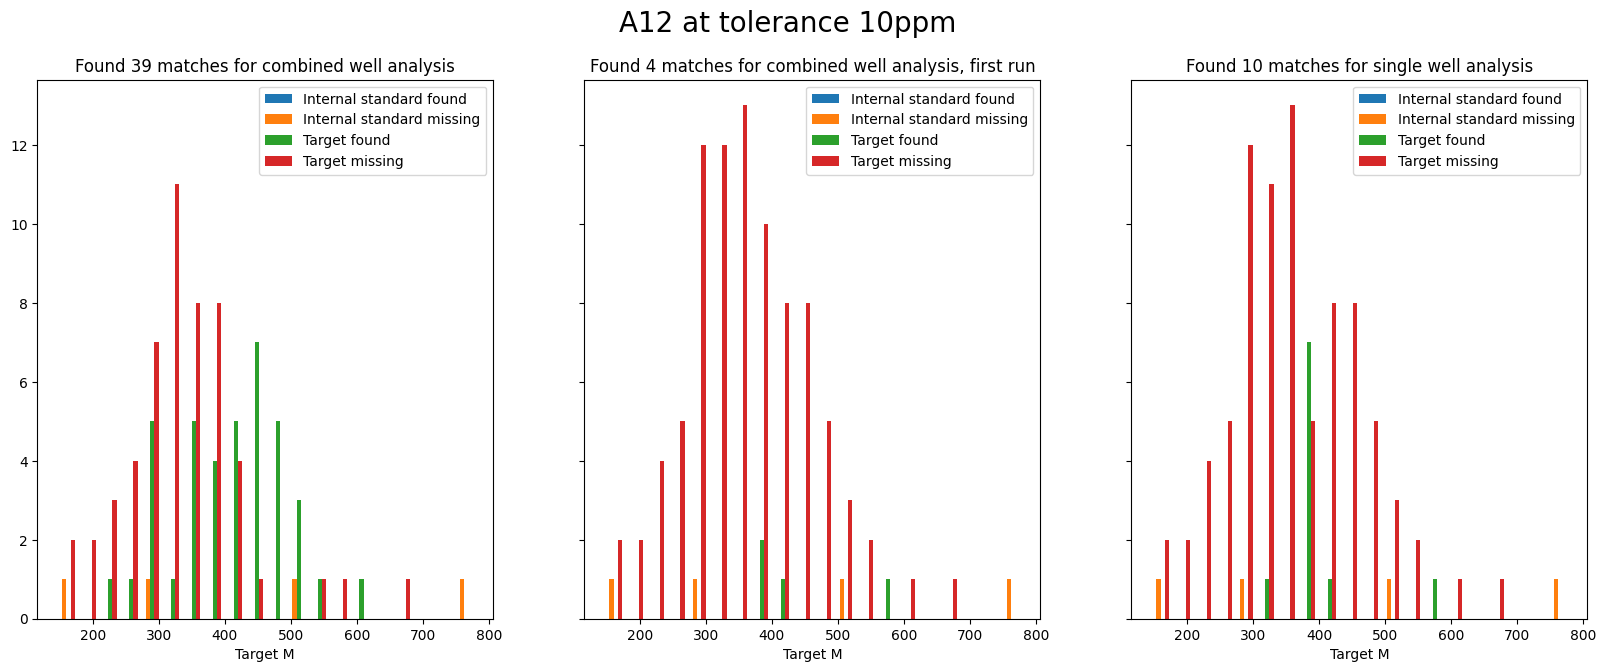

In [5]:
plot_findings(msms_new,msms,well="A12",ppm=10, values_df=values_df)

## Run through all wells 

In [6]:

tot=0
for well in msms["Well"].unique():
    match,not_found,i_match,i_not_found=match_one_well(msms,well,10,values_df,True)[0:4]
    tot=tot+len(match)
print("A total of ", tot, "matches")     

----- Targeting B14
Found 7 / 96 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting B22
Found 2 / 92 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting B18
Found 24 / 98 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting B12
Found 9 / 97 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting B01
Found 7 / 93 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting B08
Found 2 / 94 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting B13
Found 3 / 98 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting A10
Found 5 / 96 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting A12
Found 4 / 92 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting A17
Found 8 / 94 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Tar

## Combine single datafiles

In [7]:
data_combined=pd.DataFrame(columns=msms.columns)
ppm=10
well_list=['A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14']
for well in well_list:#['A06', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10']:#msms["Well"].unique():
    data_out=match_one_well(msms_new,well,ppm,values_df)[-1]
    data_combined=pd.concat([data_combined,data_out])
 

data_combined_old=pd.DataFrame(columns=msms.columns)

for well in well_list :#['A06', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10']:#msms_old["Well"].unique():
    data_out=match_one_well(msms,well,ppm,values_df)[-1]
    data_combined_old=pd.concat([data_combined_old,data_out])



data_combined_single=pd.DataFrame(columns=msms.columns)
for well in well_list:

    path="../first_plate/Exported_data/"+well+"/" + well + ".msmsonly.csv"
    msms_one=pd.read_csv(path)
    
    print("----- Targeting", well)
    target_list=values_df[values_df["Position"]==well.split()[0]]

    match,not_found,data_out=count_matches(msms_one,target_list,ppm)
    data_combined_single=pd.concat([data_combined_single,data_out])

----- Targeting A02
Found 43 / 97 matches at 10 ppm
----- Targeting A03
Found 32 / 92 matches at 10 ppm
----- Targeting A04


C:\Users\klds816\AppData\Local\Temp\ipykernel_2276\335835792.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Found 35 / 93 matches at 10 ppm
----- Targeting A05
Found 40 / 96 matches at 10 ppm
----- Targeting A06
Found 40 / 94 matches at 10 ppm
----- Targeting A07
Found 38 / 97 matches at 10 ppm
----- Targeting A08
Found 50 / 98 matches at 10 ppm
----- Targeting A09
Found 14 / 90 matches at 10 ppm
----- Targeting A10
Found 46 / 96 matches at 10 ppm
----- Targeting A11
Found 39 / 98 matches at 10 ppm
----- Targeting A12
Found 39 / 92 matches at 10 ppm
----- Targeting A13
Found 45 / 94 matches at 10 ppm
----- Targeting A14
Found 36 / 94 matches at 10 ppm
----- Targeting A02
Found 3 / 97 matches at 10 ppm
----- Targeting A03
Found 1 / 92 matches at 10 ppm
----- Targeting A04
Found 0 / 93 matches at 10 ppm
----- Targeting A05
Found 0 / 96 matches at 10 ppm
----- Targeting A06
Found 6 / 94 matches at 10 ppm


C:\Users\klds816\AppData\Local\Temp\ipykernel_2276\335835792.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined_old=pd.concat([data_combined_old,data_out])


----- Targeting A07
Found 10 / 97 matches at 10 ppm
----- Targeting A08
Found 5 / 98 matches at 10 ppm
----- Targeting A09
Found 12 / 90 matches at 10 ppm
----- Targeting A10
Found 5 / 96 matches at 10 ppm
----- Targeting A11
Found 11 / 98 matches at 10 ppm
----- Targeting A12
Found 4 / 92 matches at 10 ppm
----- Targeting A13
Found 14 / 94 matches at 10 ppm
----- Targeting A14
Found 9 / 94 matches at 10 ppm
----- Targeting A02
Found 8 / 97 matches at 10 ppm


C:\Users\klds816\AppData\Local\Temp\ipykernel_2276\335835792.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined_single=pd.concat([data_combined_single,data_out])


----- Targeting A03
Found 3 / 92 matches at 10 ppm
----- Targeting A04
Found 3 / 93 matches at 10 ppm
----- Targeting A05
Found 3 / 96 matches at 10 ppm
----- Targeting A06
Found 20 / 94 matches at 10 ppm
----- Targeting A07
Found 46 / 97 matches at 10 ppm
----- Targeting A08
Found 18 / 98 matches at 10 ppm
----- Targeting A09
Found 46 / 90 matches at 10 ppm
----- Targeting A10
Found 11 / 96 matches at 10 ppm
----- Targeting A11
Found 35 / 98 matches at 10 ppm
----- Targeting A12
Found 10 / 92 matches at 10 ppm
----- Targeting A13
Found 79 / 94 matches at 10 ppm
----- Targeting A14
Found 39 / 94 matches at 10 ppm


## Plot differance from target

Text(0.5, 0.98, "Wells 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14' at 10ppm")

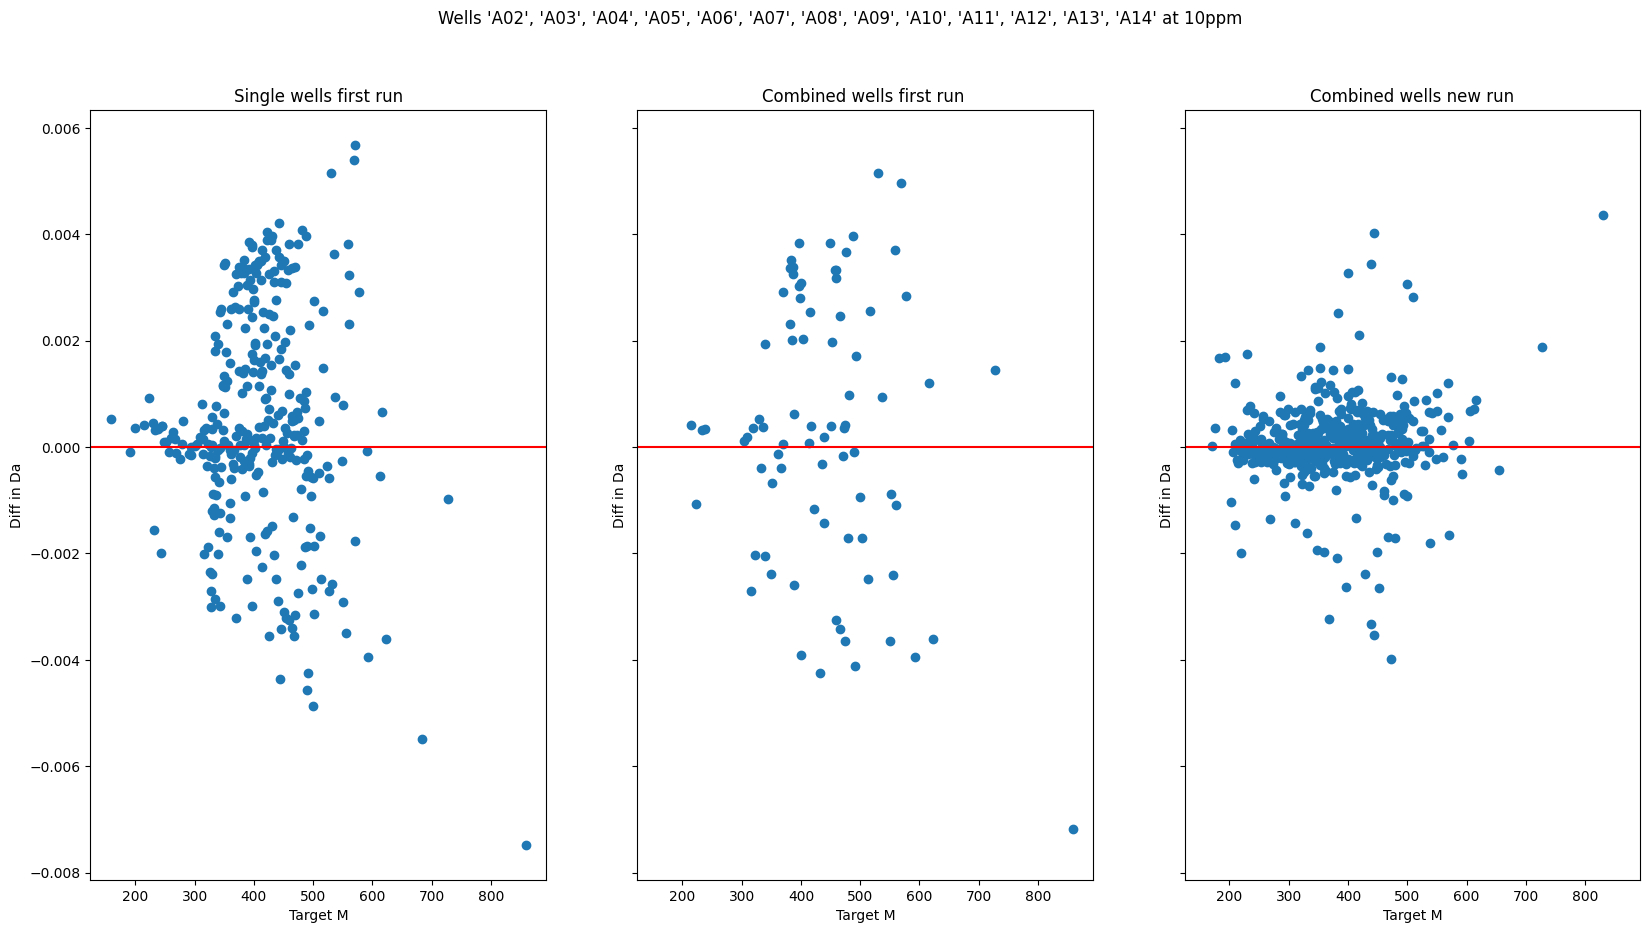

In [8]:
data=data_combined_single.dropna(subset="Target")

fig,ax=plt.subplots(1,3,figsize=(20, 10), sharey=True, sharex=True)
ax[0].scatter(data["Target"],data["PEPMASS"]-data["Target"])
ax[0].set_ylabel("Diff in Da")
ax[0].set_xlabel("Target M")
ax[0].set_title("Single wells first run")
ax[0].axhline(y=0, color='r', linestyle='-')

data=data_combined_old.dropna(subset="Target")
#fig = plt.figure(figsize=(10, 10))

ax[1].scatter(data["Target"],data["PEPMASS"]-data["Target"])
ax[1].set_ylabel("Diff in Da")
ax[1].set_xlabel("Target M")
ax[1].set_title("Combined wells first run ")
ax[1].axhline(y=0, color='r', linestyle='-')
#fig.suptitle("Well A02 to A10")


data=data_combined.dropna(subset="Target")
#fig = plt.figure(figsize=(10, 10))

ax[2].scatter(data["Target"],data["PEPMASS"]-data["Target"])
ax[2].set_ylabel("Diff in Da")
ax[2].set_xlabel("Target M")
ax[2].set_title("Combined wells new run")
ax[2].axhline(y=0, color='r', linestyle='-')
fig.suptitle("Wells "+str(well_list).strip("[").strip("]")+" at "+ str(ppm)+"ppm")

----- Targeting A12
Found 4 / 92 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
First run
----- Targeting A12
Found 39 / 92 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm


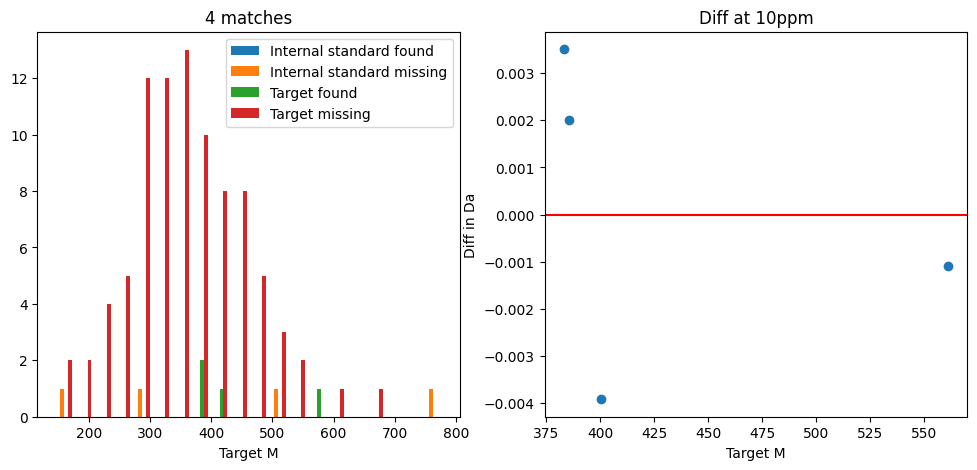

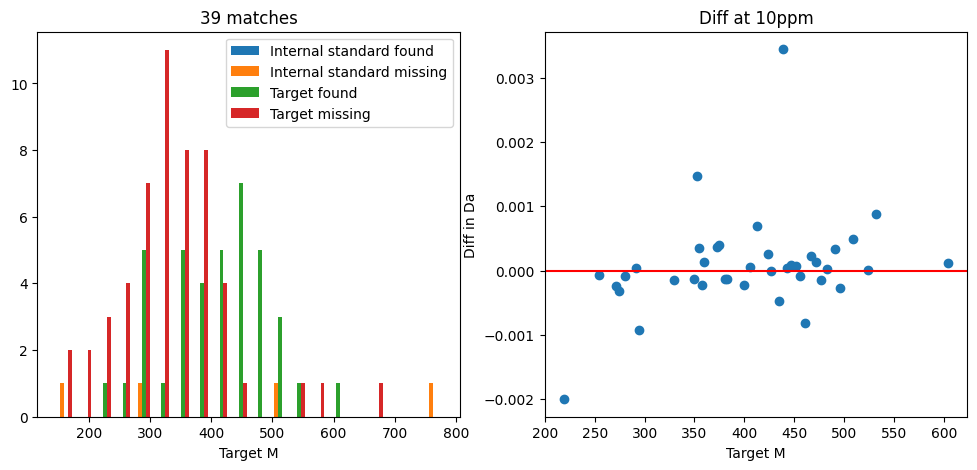

In [9]:

well="A12"
ppm=10
plot_match_and_error(msms,well,ppm,values_df)
print("First run")
plot_match_and_error(msms_new,well,ppm,values_df)

In [36]:
data_combined=pd.DataFrame(columns=msms.columns)
ppm=10

for well in msms_new["Well"].unique():
    data_out=match_one_well(msms_new,well,ppm, values_df)[-1]
    data_combined=pd.concat([data_combined,data_out])
data=data_combined.dropna(subset="Target")
#fig = plt.figure(figsize=(10, 10))

----- Targeting C06
Found 9 / 96 matches at 10 ppm
----- Targeting B11
Found 45 / 94 matches at 10 ppm
----- Targeting B21


C:\Users\klds816\AppData\Local\Temp\ipykernel_25636\3552182183.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Found 39 / 95 matches at 10 ppm
----- Targeting C12
Found 43 / 95 matches at 10 ppm
----- Targeting A07
Found 38 / 97 matches at 10 ppm
----- Targeting A24
Found 43 / 91 matches at 10 ppm
----- Targeting B12
Found 44 / 97 matches at 10 ppm
----- Targeting B03
Found 11 / 89 matches at 10 ppm
----- Targeting A09
Found 14 / 90 matches at 10 ppm
----- Targeting B10
Found 8 / 92 matches at 10 ppm
----- Targeting B18
Found 11 / 98 matches at 10 ppm
----- Targeting A16
Found 16 / 95 matches at 10 ppm
----- Targeting C08
Found 10 / 90 matches at 10 ppm
----- Targeting B02
Found 13 / 98 matches at 10 ppm
----- Targeting C10
Found 40 / 92 matches at 10 ppm
----- Targeting B16
Found 16 / 95 matches at 10 ppm
----- Targeting B22
Found 7 / 92 matches at 10 ppm
----- Targeting C02
Found 10 / 93 matches at 10 ppm
----- Targeting B04
Found 42 / 96 matches at 10 ppm
----- Targeting B19
Found 37 / 97 matches at 10 ppm
----- Targeting A05
Found 40 / 96 matches at 10 ppm
----- Targeting B07
Found 46 / 93 

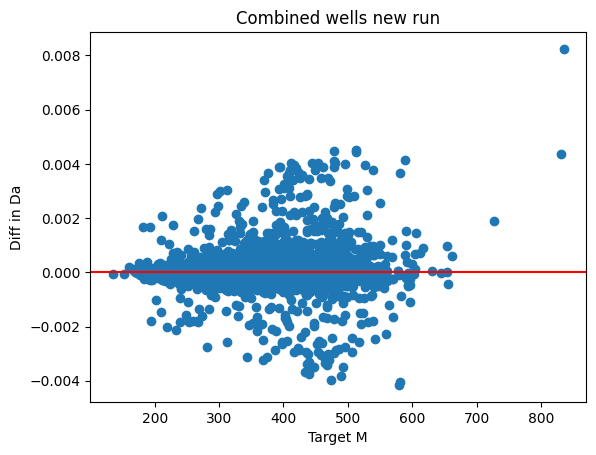

In [37]:
plt.scatter(data["Target"],data["PEPMASS"]-data["Target"])
plt.ylabel("Diff in Da")
plt.xlabel("Target M")
plt.title("Combined wells new run")
plt.axhline(y=0, color='r', linestyle='-')

# Test: Merge with MS/MS
- Preprocessing for modelling 


- Full python script exist

In [40]:
data_combined=pd.DataFrame(columns=msms.columns)
ppm=50

for well in msms_new["Well"].unique():
    data_out=match_one_well(msms_new,well,ppm,values_df)[-1]
    data_combined=pd.concat([data_combined,data_out])


----- Targeting C06
Found 42 / 96 matches at 50 ppm
----- Targeting B11
Found 49 / 94 matches at 50 ppm
----- Targeting B21


C:\Users\klds816\AppData\Local\Temp\ipykernel_25636\3365911229.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Found 41 / 95 matches at 50 ppm
----- Targeting C12
Found 47 / 95 matches at 50 ppm
----- Targeting A07
Found 41 / 97 matches at 50 ppm
----- Targeting A24
Found 45 / 91 matches at 50 ppm
----- Targeting B12
Found 47 / 97 matches at 50 ppm
----- Targeting B03
Found 27 / 89 matches at 50 ppm
----- Targeting A09
Found 33 / 90 matches at 50 ppm
----- Targeting B10
Found 24 / 92 matches at 50 ppm
----- Targeting B18
Found 36 / 98 matches at 50 ppm
----- Targeting A16
Found 28 / 95 matches at 50 ppm
----- Targeting C08
Found 33 / 90 matches at 50 ppm
----- Targeting B02
Found 35 / 98 matches at 50 ppm
----- Targeting C10
Found 42 / 92 matches at 50 ppm
----- Targeting B16
Found 45 / 95 matches at 50 ppm
----- Targeting B22
Found 39 / 92 matches at 50 ppm
----- Targeting C02
Found 32 / 93 matches at 50 ppm
----- Targeting B04
Found 51 / 96 matches at 50 ppm
----- Targeting B19
Found 39 / 97 matches at 50 ppm
----- Targeting A05
Found 42 / 96 matches at 50 ppm
----- Targeting B07
Found 47 / 9

In [4]:
data_filtered=data_combined.dropna(subset="Target")#.iloc[:,[-1,1,2,3,4,8,-4,-3,-2]]

NameError: name 'data_combined' is not defined

In [217]:
data_filtered.to_csv("matched_A02_B23_new.csv")

In [109]:
def read_rawfile(input_df):
    df_mgf = mgfReader.read(input_df)
    df = pd.DataFrame(df_mgf)
    return df
spectrum=read_rawfile("first_plate/Exported_data/A01_B23_no_recursive_fitting/A01-B23.gnps.mgf")

In [112]:
spectrum["FEATURE_ID"]=spectrum["FEATURE_ID"].astype(int)
    
df=spectrum.merge(data_filtered, right_on="FEATURE_ID", left_on="FEATURE_ID", how="right")
df.columns=['SCANS', 'FEATURE_ID', 'PrecursorMZ', 'MSLEVEL', 'CHARGE', 'POLARITY',
       'RTINMINUTES', 'Precursor_type', 'peaks', "Name", 'RT', 'PrecursorM', 'CCS','ADDUCT',
        'Target', 'SMILES','InChIKey']

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(matched_msms["Target"],matched_msms["PEPMASS"]-matched_msms["Target"])
ax.set_ylabel("Diff")
ax.set_xlabel("Target M")
ax.set_title("Target vs closest in " +target_data+" for tolerance "+str(tolerance))
ax.axhline(y=0, color='r', linestyle='-')
ax.set_ylim(-tolerance,tolerance)

# Process all data

In [19]:
!python match_to_target_combined_df.py -m ../New_run/A01-C24_50/A01-C24.msmsonly.csv -t ../first_plate/first_plate_targets.csv -s ../New_run/A01-C24_50/A01-C24.gnps.mgf -p 10 -o test.csv 
#!python filter_data.py -i "test.csv" -o "test_preprocessed.csv"
#!python filter_data.py -i "A01-C24_combined_matched.csv" -o "A01-C24_combined_preprocessed.csv"
#!python match_to_target_combined_df.py -m ../New_run/D01-G24_50/D01-G24.msmsonly.csv -t ../Tims_tof_första_plattan/first_plate_targets.csv -s ../New_run/D01-G24_50/D01-G24.gnps.mgf -p 50 -o test.csv 

Working with Python 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
Number of mz found in just one sample:  6904
----- Targeting A24
Found 44 / 91 matches at 10.0 ppm
----- Targeting B03
Found 9 / 89 matches at 10.0 ppm
----- Targeting B10
Found 9 / 92 matches at 10.0 ppm
----- Targeting B18
Found 8 / 98 matches at 10.0 ppm
----- Targeting A09
Found 19 / 90 matches at 10.0 ppm
----- Targeting A16
Found 17 / 95 matches at 10.0 ppm
----- Targeting C08
Found 10 / 90 matches at 10.0 ppm
----- Targeting A05
Found 42 / 96 matches at 10.0 ppm
----- Targeting B16
Found 21 / 95 matches at 10.0 ppm
----- Targeting C10
Found 38 / 92 matches at 10.0 ppm
----- Targeting B08
Found 42 / 94 matches at 10.0 ppm
----- Targeting A19
Found 39 / 98 matches at 10.0 ppm
----- Targeting B01
Found 23 / 93 matches at 10.0 ppm
----- Targeting A02
Found 44 / 97 matches at 10.0 ppm
----- Targeting C11
Found 6 / 93 matches at 10.0 ppm
----- Targeting B14
Found 41 / 96 matches at 10.0 

C:\Users\klds816\Box Sync\MS models\Scripts\match_to_target_combined_df.py:46: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  values_df= pd.read_csv(args.target,sep=";")
C:\Users\klds816\Box Sync\MS models\Scripts\match_to_target_combined_df.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


At 50ppm for A01 to C24
Using Threshold of 1000 (intensity) matches found: 2438
Using Threshold of 50 (intensity) matches found: 2480

At 50ppm for D01 to G24
Using Threshold of 50 (intensity) matches found: 3455

# Train model


Doesn't work on Windows, need fiora

In [226]:

!python ../../'MS models'/fiora/notebooks/train_model_test.py -i test_preprocessed.csv -l 0.0001 -e 100 -t "mona_tuned_20250404_10ppm" -m ../../checkpoint_Mona_only.best.pt
!python ../'MS models'/fiora/notebooks/train_model_test.py -i test_A01_B23_processed_new.csv -l 0.00005 -e 100 -t "test_new_mona_tuned" -m ../checkpoint_Mona_only.best.pt

[14:23:33] WARNING: not removing hydrogen atom without neighbors
[14:23:33] WARNING: not removing hydrogen atom without neighbors
[14:23:33] WARNING: not removing hydrogen atom without neighbors
Working with Python 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]
Filtering based on CE and weight
Filtering spectra (1928) down to 1928
Filtering low peak counts
Removed  104 due to less then 2 peaks
Split into training, testing and validation
Running on device: cuda:0
Training model
dataset
test           183
train         1456
validation     183
Name: group_id, dtype: int64
Prepared training/validation with 1641 data points
Using pre-arranged train/validation set
/home/michaelah/miniconda3/envs/fiora/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: FutureWarning: The default value for `maximize` will be changed from `True` to `None` in v1.7.0 of TorchMetrics,will automatically infer the value based on the `higher_is_better` attribute of the me

In [ ]:
#DONE REMOVE best yet


!python ../../'MS models'/fiora/notebooks/train_model_test.py -i processed_data/test_A01_B23_processed_new.csv -l 0.00005 -e 100 -t "test_new_mona_tuned" -m ../../checkpoint_Mona_only.best.pt